# Genuine Vergleiche

## Formel

$N$: Anzahl der Personen

$t$: Anzahl der Samples des gleichen biometrischen Merkmals

$N\cdot\frac{t\cdot(t-1)}{2}$

In [19]:
from IPython.display import Math
import math
import decimal

n = int(input("N:"))
t = int(input("t:"))

r = n*(t*(t-1))/2

display(Math(str(n)+'\cdot \\frac{'+str(t) +'\cdot('+str(t) +'-1)}{2}=' + str(r)))

N: 4
t: 5


<IPython.core.display.Math object>

# Imposter Vergleiche

## Formel

$N$: Anzahl der Personen

$t$: Anzahl der Samples des gleichen biometrischen Merkmals

$\frac{N\cdot(N-1)}{2}\cdot t^2$

In [32]:
from IPython.display import Math
import math
import decimal

n = int(input("N:"))
t = int(input("t:"))

r = ((n*(n-1))/2)*t**2

display(Math('\\frac{'+str(n) + '\cdot(' + str(n) + '-1)}{2}\cdot '+str(t)+'^2 =' +str(r)))

N: 4
t: 5


<IPython.core.display.Math object>

# FPIR (FMR$_N$)

## Formel

Ein False Positive Identification liegt vor, wenn eine Identitaet aus der Referenzdatenbank zurueckgegeben wird obwohl der Nutzer nicht ins System enrollt wurde.

$FPIR=1-(1-FMR_1)^N$

$(1-FMR)$: Wahrscheinlichkeit, dass kein Single False Match auftritt

$(1-FMR)^N$: Wahrscheinlichkeit, dass kein einziger False Match ueber alle N Sample auftritt

In [43]:
from IPython.display import Math
import math
import decimal

fmr = float(input("FMR (as number, NOT a percentage):"))
n = int(input("N:"))

fpir = 1-(1-fmr)**n

display(Math('FPIR=1-(1-' + format(fmr, '.20f').rstrip('0') + ')^{' + str(n) + '}=' + str(fpir)))

FMR (as number, NOT a percentage): 0.00001
N: 10000


<IPython.core.display.Math object>

# DET-Kurven

## Formel

$L=L_1+L_0$: Anzahl der einzelnen Match-Scores $s_i$

$L_1$: Anzahl der Samples des gleichen biometrischen Merkmals

$L_0$: Anzahl der Samples des gleichen biometrischen Merkmals

$FAR(\eta_j) = \frac{1}{L_0} \sum^L_{i=L_1+1} I(s_i >= \eta_j)$

$FRR(\eta_j) = \frac{1}{L_1} \sum^{L_1}_{i=1} I(s_i < \eta_j)$

$I(x) = x ? 1 : 0$

'Genuine Count = 23'

'Imposter Count = 21'

'Total Count = 44'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

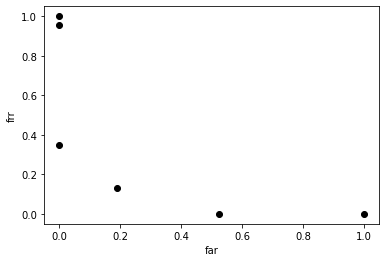

In [34]:
schwellenwerte = [0.5,0.6,0.7,0.8,0.9,1.0]
genuine_scores = [
    0.84,
    0.88,
    0.88,
    0.8,
    0.86,
    0.88,
    0.83,
    0.77,
    0.8,
    0.83,
    0.71,
    0.85,
    0.88,
    0.87,
    0.78,
    0.75,
    0.9,
    0.85,
    0.87,
    0.75,
    0.67,
    0.69,
    0.68
]
imposter_scores = [
    0.64,
    0.57,
    0.5,
    0.66,
    0.58,
    0.5,
    0.51,
    0.65,
    0.57,
    0.57,
    0.54,
    0.69,
    0.68,
    0.57,
    0.56,
    0.62,
    0.68,
    0.75,
    0.73,
    0.73,
    0.73
]

from IPython.display import Math
from matplotlib import pyplot
import math
import decimal

display("Genuine Count = " + str(len(genuine_scores)))
display("Imposter Count = " + str(len(imposter_scores)))
display("Total Count = " + str(len(genuine_scores)+len(imposter_scores)))

for nj in schwellenwerte:
    # FAR
    farCount = 0
    for i in imposter_scores:
        if i >= nj:
            farCount = farCount + 1
    far = farCount/len(imposter_scores)
    display(Math('FAR('+str(nj)+')=\\frac{1}{'+str(len(imposter_scores))+'}\cdot ' + str(farCount) + '='+str(far)))
    
    # FRR
    frrCount = 0
    for i in genuine_scores:
        if i < nj:
            frrCount = frrCount + 1
    frr = frrCount/len(genuine_scores)
    display(Math('FRR('+str(nj)+')=\\frac{1}{'+str(len(genuine_scores))+'}\cdot ' + str(frrCount) + '='+str(frr)))
    
    pyplot.plot(far,frr,'ok-')

pyplot.xlabel("far")
pyplot.ylabel("frr")
pyplot.show()